# BANK LOAN CASE STUDY
## WHAT ISSUE THE BANK IS FACING 
- When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

## OBJECTIVE OF THE CASE STUDY
- This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.



# LETS EXPLORE THE DATA AND ANALYSE OUR FINDINGS

### importing required libraries

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading and Understanding data

In [399]:
#Loading data into Notebook
app= pd.read_csv(r"C:\Users\yasin\Downloads\Credit EDA Case Study\Credit EDA Case Study\application_data.csv")

In [400]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [401]:
#Finding the number of rows and columns present in the table respectively
app.shape

(307511, 122)

In [402]:
#Finding the data types of the columns present 
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [403]:
#Describing the data(looking at mean,median,std. etc values)
app.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# Data Cleaning and Manipulation

### Checking for Null/ Missing values

In [404]:
x= app.isnull().mean().sort_values(ascending=False)*100

In [405]:
#Using to_string to display all null columns 
print(x.to_string())

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [406]:
#Selecting columns which are having less than 40% missing value
app= app.loc[:,(x <=40)]


In [407]:
#checking shape of the dataset
app.shape


(307511, 73)

In [408]:
#Dropping columns from the remaining 73 columns which are of no use 
no_use=["EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR","NAME_TYPE_SUITE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
       "DEF_60_CNT_SOCIAL_CIRCLE","EXT_SOURCE_2","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_7","FLAG_DOCUMENT_6","FLAG_DOCUMENT_2","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21",
       "DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_EMP_PHONE","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL","WEEKDAY_APPR_PROCESS_START","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","FLAG_CONT_MOBILE"]
app= app.drop(no_use, axis=1)

In [409]:
#To Display all the rows and columns when typing head(), etc
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.0,Business Entity Type 3,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.0,School,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.0,Government,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.0,Business Entity Type 3,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.0,Religion,-1106.0


In [410]:
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

In [411]:
app.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE               96391
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
NAME_EDUCATION_TYPE               0
ORGANIZATION_TYPE                 0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
REGION_POPULATION_RELATIVE        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
SK_ID_CURR                        0
TARGET                            0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
FLAG_OWN_REALTY                   0
FLAG_OWN_CAR                      0
CODE_GENDER                       0
NAME_CONTRACT_TYPE                0
NAME_INCOME_TYPE                  0
dtype: int64

In [412]:
app.isnull().mean().sort_values(ascending=False)*100

OCCUPATION_TYPE               31.345545
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_EDUCATION_TYPE            0.000000
ORGANIZATION_TYPE              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_POPULATION_RELATIVE     0.000000
NAME_HOUSING_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000
SK_ID_CURR                     0.000000
TARGET                         0.000000
AMT_CREDIT                     0.000000
AMT_INCOME_TOTAL               0.000000
CNT_CHILDREN                   0.000000
FLAG_OWN_REALTY                0.000000
FLAG_OWN_CAR                   0.000000
CODE_GENDER                    0.000000
NAME_CONTRACT_TYPE             0.000000
NAME_INCOME_TYPE               0.000000
dtype: float64

- Here occupation type has 96,000 missing values, hence we cant impute it with some other values

### Imputing/Removing missing categorical values first

In [413]:
app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

-Organization type has 55,000 XNA values, we cant impute it as it is a high value so we will treat it as missing values

In [414]:
#treating XNA values as missing data
app.loc[app.ORGANIZATION_TYPE == "XNA","ORGANIZATION_TYPE"]= np.NaN

In [415]:
app.ORGANIZATION_TYPE.isnull().sum()

55374

In [416]:
#Family Status has 2 unknown values, We will impute it 
app.NAME_FAMILY_STATUS.value_counts()


Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [417]:
#Married column is the most occuring 
app.NAME_FAMILY_STATUS.mode()

0    Married
Name: NAME_FAMILY_STATUS, dtype: object

In [418]:
#Imputing Unknown to Married
app.NAME_FAMILY_STATUS.replace("Unknown", "Married", inplace=True)

In [419]:
#Checking is replaced or not
app.NAME_FAMILY_STATUS.value_counts()


Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [420]:
#checking for any xna, null values
app.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [421]:
#checking for any xna, null values
app.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [422]:
#Gender has 4 missing values. We will impute it into male or female
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [423]:
#Mode values show Female is the most occuring, hence we will put 4 Xna values into Female category
app.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

In [424]:
app.CODE_GENDER.replace("XNA","F", inplace=True)

In [425]:
app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [426]:
app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [427]:
app.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

### Imputing/Removing missing numerical values


In [428]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

In [429]:
app.AMT_ANNUITY.isnull().sum()

12

In [430]:
amt_annmode= app.AMT_ANNUITY.mean()

<AxesSubplot:xlabel='AMT_ANNUITY'>

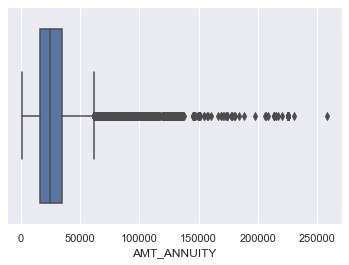

In [431]:
sns.boxplot(app.AMT_ANNUITY)

#### Filling null values with mean and median values below

In [432]:
app.AMT_ANNUITY.fillna(amt_annmode,inplace=True)

In [433]:
app.AMT_ANNUITY.isnull().sum()

0

In [434]:
app.AMT_GOODS_PRICE.isnull().sum()

278

In [435]:
app.AMT_GOODS_PRICE.fillna(app.AMT_GOODS_PRICE.median(), inplace=True)

In [436]:
app.AMT_GOODS_PRICE.isnull().sum()

0

In [437]:
app.CNT_FAM_MEMBERS.isnull().sum()

2

In [438]:
app.CNT_FAM_MEMBERS.fillna(app.CNT_FAM_MEMBERS.median(), inplace=True)

In [439]:
app.CNT_FAM_MEMBERS.isnull().sum()

0

In [440]:
# Dropping null values from last phone change column 
app= app[~app.DAYS_LAST_PHONE_CHANGE.isnull()].copy()

### Checking Data Types

In [441]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307510 non-null  int64  
 1   TARGET                      307510 non-null  int64  
 2   NAME_CONTRACT_TYPE          307510 non-null  object 
 3   CODE_GENDER                 307510 non-null  object 
 4   FLAG_OWN_CAR                307510 non-null  object 
 5   FLAG_OWN_REALTY             307510 non-null  object 
 6   CNT_CHILDREN                307510 non-null  int64  
 7   AMT_INCOME_TOTAL            307510 non-null  float64
 8   AMT_CREDIT                  307510 non-null  float64
 9   AMT_ANNUITY                 307510 non-null  float64
 10  AMT_GOODS_PRICE             307510 non-null  float64
 11  NAME_INCOME_TYPE            307510 non-null  object 
 12  NAME_EDUCATION_TYPE         307510 non-null  object 
 13  NAME_FAMILY_ST

### Changing values of FLAG_OWN_CAR, FLAG_OWN_REALTY with 0 being No and 1 being Yes

In [442]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.0,Business Entity Type 3,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.0,School,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.0,Government,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.0,Business Entity Type 3,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.0,Religion,-1106.0


In [443]:
app["FLAG_OWN_CAR"]= np.where(app.FLAG_OWN_CAR=="Y",1,0)

In [444]:
app["FLAG_OWN_REALTY"]= np.where(app.FLAG_OWN_REALTY=="Y",1,0)

In [445]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.0,Business Entity Type 3,-1134.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.0,School,-828.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.0,Government,-815.0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.0,Business Entity Type 3,-617.0
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.0,Religion,-1106.0


##### Changing negative values with positive values in DAYS_BIRTH, DAYS_EMPLOYED, DAYS_LAST_PHONE_CHANGE columns

In [446]:
abs1= ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_LAST_PHONE_CHANGE"]
for i in abs1:
    app[i]= app[i].abs()

In [447]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,Laborers,1.0,Business Entity Type 3,1134.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,Core staff,2.0,School,828.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,Laborers,1.0,Government,815.0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,Laborers,2.0,Business Entity Type 3,617.0
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,Core staff,1.0,Religion,1106.0


##### Converting Days of Days_birth to years

In [448]:
app["DAYS_BIRTH"]= app.DAYS_BIRTH.apply(lambda x: x//365)

In [449]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,Laborers,1.0,Business Entity Type 3,1134.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,1188,Core staff,2.0,School,828.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,Laborers,1.0,Government,815.0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,Laborers,2.0,Business Entity Type 3,617.0
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,Core staff,1.0,Religion,1106.0


In [450]:
# renaming Days_birth column to Age column
app.rename(columns={"DAYS_BIRTH":"AGE"},inplace=True)

In [451]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,Laborers,1.0,Business Entity Type 3,1134.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,1188,Core staff,2.0,School,828.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,Laborers,1.0,Government,815.0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,Laborers,2.0,Business Entity Type 3,617.0
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,Core staff,1.0,Religion,1106.0


### BINNING VALUES

##### Binning AGE values into 0-30, 30-40, 40-50, 50-60, 60+

In [452]:
app.AGE.describe()

count    307510.000000
mean         43.436035
std          11.954556
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

<AxesSubplot:>

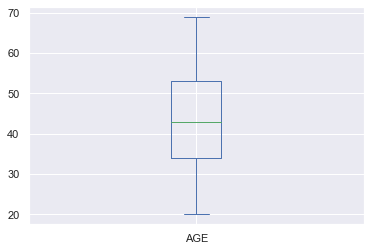

In [453]:
app.AGE.plot.box()

In [454]:
app["AGE_GROUP"]= pd.cut(app.AGE,[0,30,40,50,60,99], labels=["<30","30-40","40-50","50-60","60+"])

In [455]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,Laborers,1.0,Business Entity Type 3,1134.0,<30
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,1188,Core staff,2.0,School,828.0,40-50
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,Laborers,1.0,Government,815.0,50-60
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,Laborers,2.0,Business Entity Type 3,617.0,50-60
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,Core staff,1.0,Religion,1106.0,50-60


##### binning AMT_INCOME_TOTAL

In [456]:
app["INCOME_CLASS"]= pd.qcut(app.AMT_INCOME_TOTAL,[0,0.25,0.50,0.75,0.90,1], labels=["Very Low","Low","Medium","High","Very High"])

In [457]:
app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_CLASS
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,Laborers,1.0,Business Entity Type 3,1134.0,<30,Medium
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,1188,Core staff,2.0,School,828.0,40-50,High
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,Laborers,1.0,Government,815.0,50-60,Very Low
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,Laborers,2.0,Business Entity Type 3,617.0,50-60,Low
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,Core staff,1.0,Religion,1106.0,50-60,Low
5,100008,0,Cash loans,M,0,1,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,1588,Laborers,2.0,Other,2536.0,40-50,Very Low
6,100009,0,Cash loans,F,1,1,1,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,37,3130,Accountants,3.0,Business Entity Type 3,1562.0,30-40,Medium
7,100010,0,Cash loans,M,1,1,0,360000.0,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,0.003122,51,449,Managers,2.0,Other,1070.0,50-60,Very High
8,100011,0,Cash loans,F,0,1,0,112500.0,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55,365243,NaN,2.0,NaN,0.0,50-60,Very Low
9,100012,0,Revolving loans,M,0,1,0,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,39,2019,Laborers,1.0,Electricity,1673.0,30-40,Low


##### Binning Days_employed to years 

In [458]:
app["DAYS_EMPLOYED"]= app.DAYS_EMPLOYED.apply(lambda x: x//365)

In [459]:
app.rename(columns={"DAYS_EMPLOYED":"YEAR_EMPLOYED"},inplace=True)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_CLASS
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1.0,Business Entity Type 3,1134.0,<30,Medium
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2.0,School,828.0,40-50,High
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1.0,Government,815.0,50-60,Very Low
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,Laborers,2.0,Business Entity Type 3,617.0,50-60,Low
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,Core staff,1.0,Religion,1106.0,50-60,Low


In [460]:
app["YEARS_EMP_GROUP"]= pd.cut(app.YEAR_EMPLOYED,bins=[-1,5,10,20,30,40,50,60,1000],labels=["0-5","5-10","10-20","20-30","30-40","40-50","50-60","60+"])

In [461]:
app.YEARS_EMP_GROUP.isnull().sum()

0

##### Binning AMT_CREDIT

In [462]:
app["AMT_CREDIT"]= app.AMT_CREDIT/100000

In [463]:
app.AMT_CREDIT.describe()

count    307510.00000
mean          5.99027
std           4.02491
min           0.45000
25%           2.70000
50%           5.13531
75%           8.08650
max          40.50000
Name: AMT_CREDIT, dtype: float64

In [464]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_CLASS,YEARS_EMP_GROUP
0,100002,1,Cash loans,M,0,1,0,202500.0,4.065975,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1.0,Business Entity Type 3,1134.0,<30,Medium,0-5
1,100003,0,Cash loans,F,0,0,0,270000.0,12.935025,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2.0,School,828.0,40-50,High,0-5
2,100004,0,Revolving loans,M,1,1,0,67500.0,1.350000,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1.0,Government,815.0,50-60,Very Low,0-5
3,100006,0,Cash loans,F,0,1,0,135000.0,3.126825,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,Laborers,2.0,Business Entity Type 3,617.0,50-60,Low,5-10
4,100007,0,Cash loans,M,0,1,0,121500.0,5.130000,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,Core staff,1.0,Religion,1106.0,50-60,Low,5-10


In [465]:
app["AMT_CREDIT_GROUP"]= pd.cut(app.AMT_CREDIT,bins=[0,1,2,3,4,5,6,7,8,9,10,100],
                                labels=["0-100k","100-200K","200-300K","300-400k","400-500k","500-600k","600-700k","700-800k",
                                       "800-900k","900-1M","1M+"])

##### Binning AMT_ANNUITY

In [466]:
app.AMT_ANNUITY.describe()

count    307510.000000
mean      27108.577804
std       14493.477922
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:>

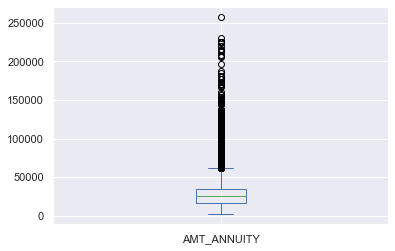

In [467]:
app.AMT_ANNUITY.plot.box()

In [468]:
app["AMT_ANNUITY"]= app.AMT_ANNUITY/1000

In [469]:
app["AMT_ANNUITY_GROUP"]= pd.cut(app.AMT_ANNUITY,bins=[0,5,10,15,20,25,30,35,100,999],
                                labels=["0-5k","5-10k","10-15k","15-20k","20-25k","25-30k","30-35k","35-100k","100k+"])

In [470]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_CLASS,YEARS_EMP_GROUP,AMT_CREDIT_GROUP,AMT_ANNUITY_GROUP
0,100002,1,Cash loans,M,0,1,0,202500.0,4.065975,24.7005,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,Laborers,1.0,Business Entity Type 3,1134.0,<30,Medium,0-5,400-500k,20-25k
1,100003,0,Cash loans,F,0,0,0,270000.0,12.935025,35.6985,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,3,Core staff,2.0,School,828.0,40-50,High,0-5,1M+,35-100k
2,100004,0,Revolving loans,M,1,1,0,67500.0,1.350000,6.7500,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,Laborers,1.0,Government,815.0,50-60,Very Low,0-5,100-200K,5-10k
3,100006,0,Cash loans,F,0,1,0,135000.0,3.126825,29.6865,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,Laborers,2.0,Business Entity Type 3,617.0,50-60,Low,5-10,300-400k,25-30k
4,100007,0,Cash loans,M,0,1,0,121500.0,5.130000,21.8655,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,Core staff,1.0,Religion,1106.0,50-60,Low,5-10,500-600k,20-25k


## Checking Data Imbalance/Ratio on Target Variable

In [471]:
app.TARGET.value_counts()

0    282685
1     24825
Name: TARGET, dtype: int64

In [472]:
# Checking the same data with Percentage
app.TARGET.value_counts(normalize=True)*100

0    91.927092
1     8.072908
Name: TARGET, dtype: float64

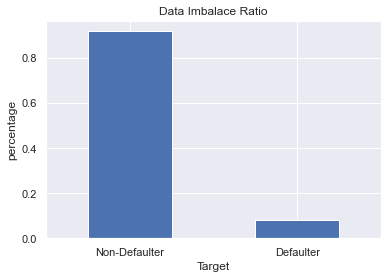

In [473]:
imbal=app.TARGET.value_counts(normalize=True).plot.bar()
plt.xticks((0,1),["Non-Defaulter","Defaulter"],rotation=360)
plt.ylabel("percentage")
plt.xlabel("Target")
plt.title("Data Imbalace Ratio")
plt.show()

- The impbalance ratio would be 2,82,685/24,825 = 11.38

## Creating Categorical List and Numerical List for Visualisations using functions 

In [474]:
Category=["NAME_CONTRACT_TYPE","CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
          "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","AGE_GROUP","INCOME_CLASS"
          ,"YEARS_EMP_GROUP","AMT_CREDIT_GROUP","AMT_ANNUITY_GROUP","CNT_CHILDREN"]
#Not including Organization type as Its alot of categories, hence we will analyse it seperately 

In [475]:
Numerical=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY",
           "AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","CNT_FAM_MEMBERS","YEAR_EMPLOYED","AGE"]

## Checking for Numerical Outliers

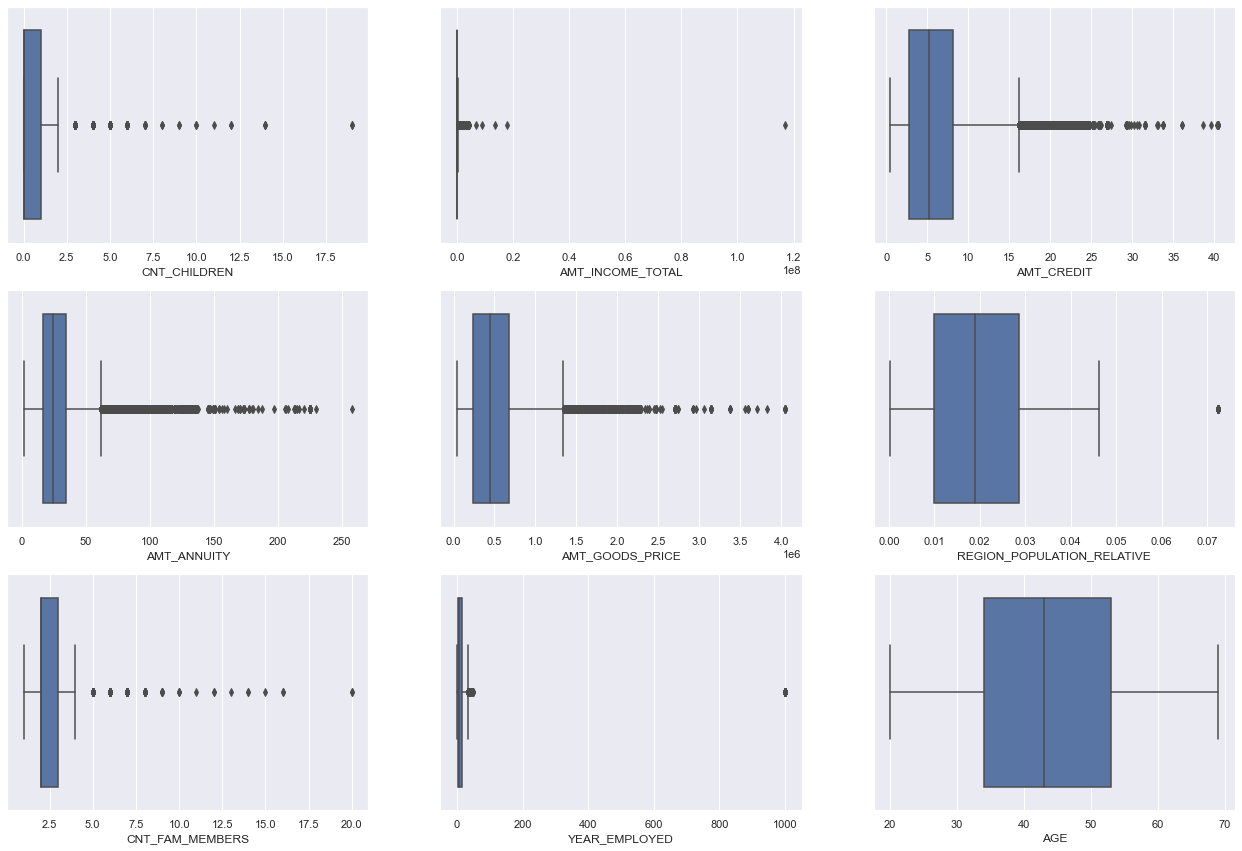

In [476]:
plt.figure(figsize=(22,20))

for i in enumerate(Numerical):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(app[i[1]])

plt.show()


- From the above diagrams we can conclude that:

- Amt_Income_Total has a very high outlier, but it does not mean it could be an error. Some people have very high income

- Amt_Credit, Amt_Annuity, Amt_Goodprice, CNT_Fam_members, Cnt_Children have outliers which are normal considering some people have many kids or many family members,or high credit/annuity value

- Year employed has an outlier error where it shows some people have been employed for 1000 years

- Age Column has no outliers which means the data is proper
 

## Univariate Analysis - Categorical Unordered 

#### CREATING PLOT FUNCTIONS SO WE CAN PLOT GRAPHS MORE CONVENIENTLY 

In [477]:
def use_bar_plot(Column,dataframe):
    dataframe[Column].value_counts().plot.bar(color="lightgreen")
    plt.title("Bar Chart of " + Column.title(), fontdict={"fontsize":12,"fontweight":5,"color":"Black"})
    plt.grid(zorder=1, axis="y")
    plt.show()
    

In [478]:
def use_barh_plot(Column,dataframe):
    dataframe[Column].value_counts().plot.barh(color="lightgreen")
    plt.title("Bar Chart of " + Column.title(), fontdict={"fontsize":12,"fontweight":5,"color":"Black"})
    plt.grid(zorder=1, axis="x")
    plt.show()

In [479]:
def use_pie_plot(Column,dataframe):
    dataframe[Column].value_counts().plot.pie()
    plt.title("Pie Chart of " + Column.title())
    plt.show()

##### NAME_CONTRACT_TYPE

In [480]:
app.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         90.478684
Revolving loans     9.521316
Name: NAME_CONTRACT_TYPE, dtype: float64

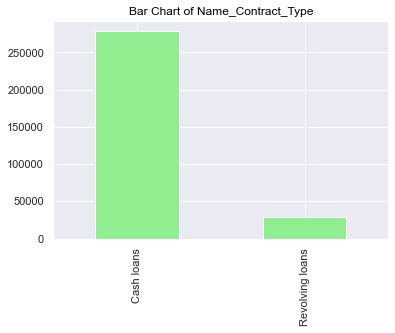

In [481]:
use_bar_plot("NAME_CONTRACT_TYPE",app)

- The Contract_type graph shows that CASH loans were taken by 90.47% of the people! and only 9.52% people took Revolving Loans

##### NAME_INCOME_TYPE

In [482]:
app.NAME_INCOME_TYPE.value_counts()

Working                 158773
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

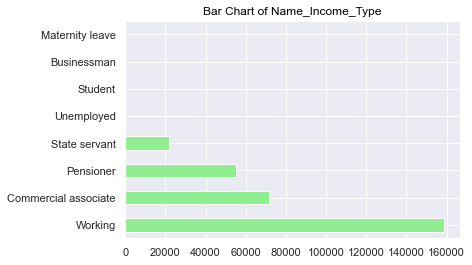

In [483]:
use_barh_plot("NAME_INCOME_TYPE",app)

- Income_type graph shows clients income type. The majority of the clients who applied for loans were working class professionals with 1,58,000 applications. Followed by Commercial associate 71,000 applications, which is followed by pensioners and State servants. 
- Unemployed, Students, Bussinessman, Maternity leave people were the least amount of people who applied for loan

##### NAME_FAMILY_STATUS

In [484]:
app.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 63.878573
Single / not married    14.778056
Civil marriage           9.682612
Separated                6.429059
Widow                    5.231700
Name: NAME_FAMILY_STATUS, dtype: float64

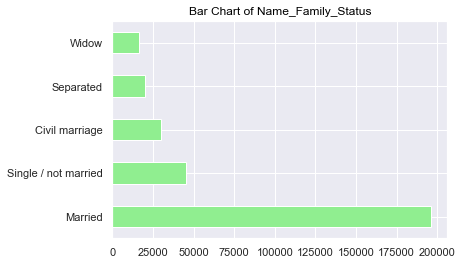

In [485]:
use_barh_plot("NAME_FAMILY_STATUS",app)

- Married people were the higher percentage of loan applicants with 63.87%. Followed by Single people having 14.77%
- Civil marriage, Seperate, Widow were among the lower percentage category who applied for loans

##### NAME_HOUSING_TYPE

In [486]:
app.NAME_HOUSING_TYPE.value_counts(normalize=True)*100

House / apartment      88.734350
With parents            4.825859
Municipal apartment     3.636630
Rented apartment        1.587265
Office apartment        0.851029
Co-op apartment         0.364866
Name: NAME_HOUSING_TYPE, dtype: float64

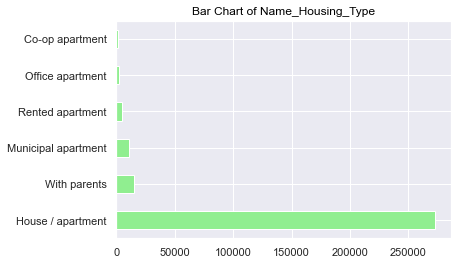

In [487]:
use_barh_plot("NAME_HOUSING_TYPE",app)

- 88.73% of the applicants were living in a House / Apartment
- 4.82% were living with their parents followed by 3.63% living in Muncipal Apartment
- Rented apartment accounted for 1.587265%, Office apartment accounted for 0.851029% and Co-op apartment accounted for             0.364866

##### OCCUPATION_TYPE

In [488]:
app.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

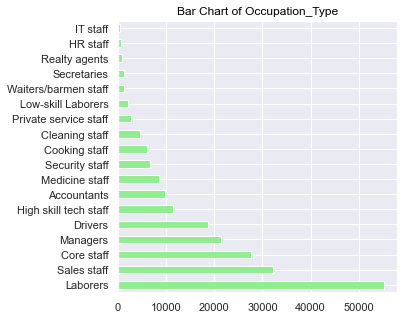

In [489]:
plt.figure(figsize=[5,5])
use_barh_plot("OCCUPATION_TYPE",app)

- As you can see from the above percentage value that Laborers were the highest percentage of people who applied for a loan having the value of 26.13%, Followed by Sales staff (15.20%), Core staff (13.05%), Managers (10.12%), Drivers (8.81%) etc

##### ORGANIZATION_TYPE

In [490]:
app.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    26.966399
Self-employed             15.234635
Other                      6.616667
Medicine                   4.439271
Business Entity Type 2     4.185440
Government                 4.126345
School                     3.527065
Trade: type 7              3.105864
Kindergarten               2.728686
Construction               2.665625
Business Entity Type 1     2.373322
Transport: type 4          2.140908
Trade: type 3              1.384570
Industry: type 9           1.335787
Industry: type 3           1.300092
Security                   1.287797
Housing                    1.173176
Industry: type 11          1.072437
Military                   1.044674
Bank                       0.994305
Agriculture                0.973284
Police                     0.928467
Transport: type 2          0.874131
Postal                     0.855491
Security Ministries        0.782911
Trade: type 2              0.753562
Restaurant                 0.718263
Services                   0

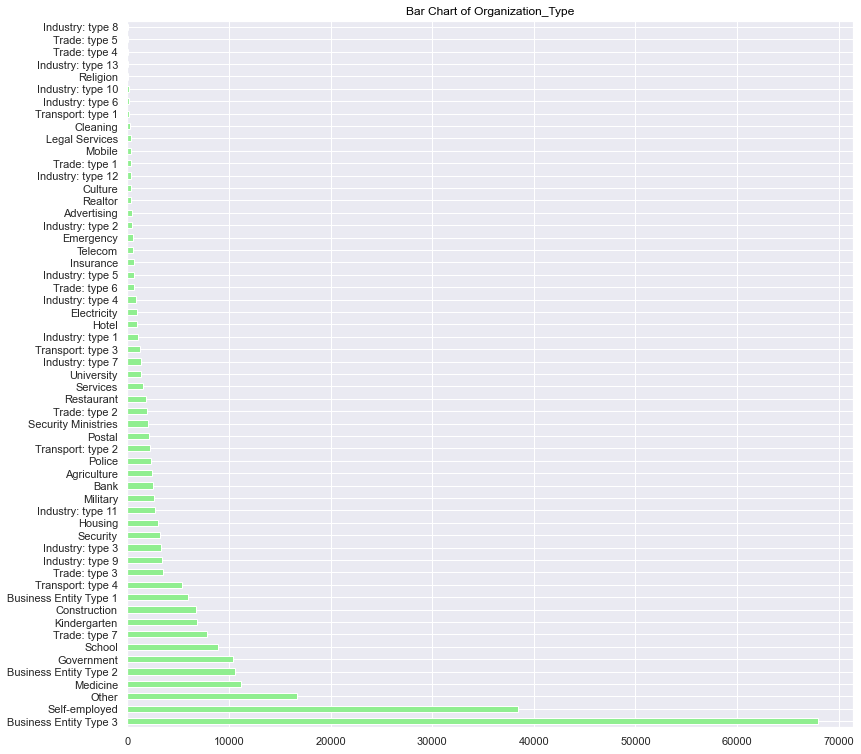

In [491]:
plt.figure(figsize=[13,13])
use_barh_plot("ORGANIZATION_TYPE",app)

- We Can tell that Business, Self employed, Medicine, Government were the major organizations the loan applicants worked for 

## Univariate Analysis- Categorical Ordered 

##### CODE_GENDER

In [492]:
app.CODE_GENDER.value_counts(normalize=True)*100

F    65.835908
M    34.164092
Name: CODE_GENDER, dtype: float64

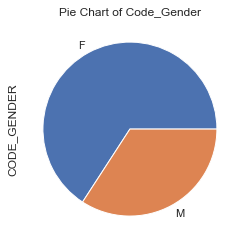

In [493]:
use_pie_plot("CODE_GENDER",app)


- 65.83% of loan appliers were infact females
- rest 34.16% being males

##### AGE_GROUP

In [494]:
app.AGE_GROUP.value_counts(normalize=True)*100

30-40    27.029040
40-50    24.194660
50-60    22.054242
<30      17.171799
60+       9.550259
Name: AGE_GROUP, dtype: float64

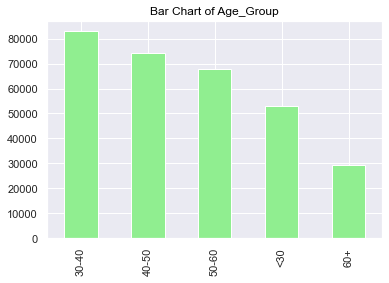

In [495]:
use_bar_plot("AGE_GROUP",app)

- The middle aged people ranging from 30-40 and 40-50 had the highest amount of loan applications
- Less than 30 and 60+ aged group applicants were lower

##### INCOME_CLASS

In [496]:
app.INCOME_CLASS.value_counts(normalize=True)*100

Very Low     32.707229
Medium       26.735066
Low          17.294072
High         14.431075
Very High     8.832558
Name: INCOME_CLASS, dtype: float64

In [497]:
app.INCOME_CLASS.value_counts()

Very Low     100578
Medium        82213
Low           53181
High          44377
Very High     27161
Name: INCOME_CLASS, dtype: int64

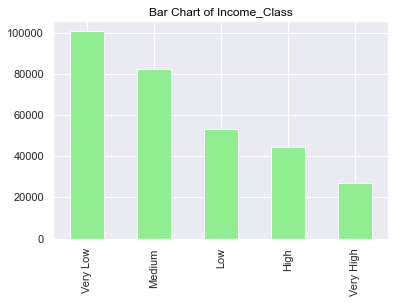

In [498]:
use_bar_plot("INCOME_CLASS",app)

- Majority of the loan appliers were from Very Low wage Income being 32.70% total
- followed by Medium class income being 26.73%
- Somehow Medium class people were ranked 2nd who applied for loans and not Low income class 

##### OWNS_CAR

In [499]:
app.FLAG_OWN_CAR.value_counts(normalize=True)*100

0    65.989399
1    34.010601
Name: FLAG_OWN_CAR, dtype: float64

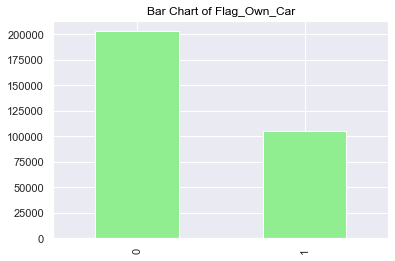

In [500]:
use_bar_plot("FLAG_OWN_CAR",app)

- 65.98% of the people own a car, They were the majority who applied for loans
- 34.01% of the people who applied do not own a car

##### OWN_REALTY

In [501]:
app.FLAG_OWN_REALTY.value_counts(normalize=True)*100

1    69.367175
0    30.632825
Name: FLAG_OWN_REALTY, dtype: float64

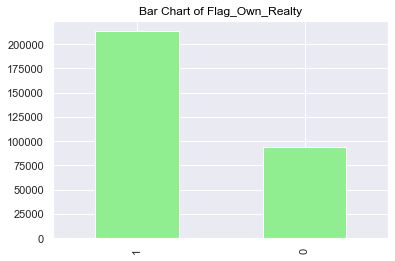

In [502]:
use_bar_plot("FLAG_OWN_REALTY",app)

- 69.36% people dont own a Realty(House or flat) 
- From the housing type column we found that 88% people lived in House/ apartments but they did not OWN it

##### YEARS_EMPLOYED

In [503]:
app.YEARS_EMP_GROUP.value_counts(normalize=True)*100

0-5      49.603915
5-10     18.205262
60+      18.007219
10-20    10.620142
20-30     2.734545
30-40     0.772007
40-50     0.056909
50-60     0.000000
Name: YEARS_EMP_GROUP, dtype: float64

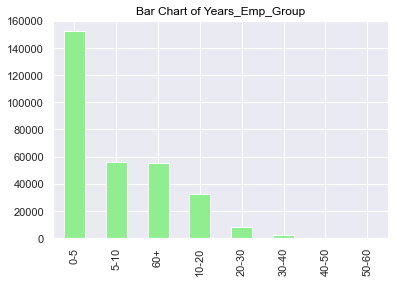

In [504]:
use_bar_plot("YEARS_EMP_GROUP",app)

- 0-5 years of experience people topped the chart with 49.60%
- with none being from 50-60 years , and some being from 40-50 years

##### AMT_CREDIT_GROUP

In [505]:
app.AMT_CREDIT_GROUP.value_counts(normalize=True)*100

200-300K    17.824461
1M+         16.254756
500-600k    11.131996
400-500k    10.418523
100-200K     9.801307
300-400k     8.564925
600-700k     7.820559
800-900k     7.086599
700-800k     6.241423
900-1M       2.902995
0-100k       1.952457
Name: AMT_CREDIT_GROUP, dtype: float64

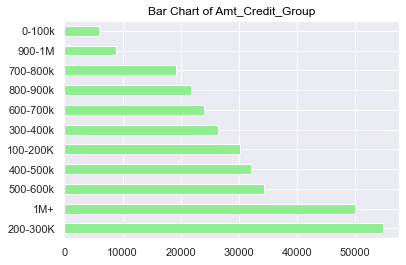

In [506]:
use_barh_plot("AMT_CREDIT_GROUP",app)

- Mainly the credit amount of loan ranged from 200-300K followed by 1M+ and followed by 500-600k

##### NAME_EDUCATION_TYPE

In [507]:
app.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    71.019154
Higher education                 24.344899
Incomplete higher                 3.341680
Lower secondary                   1.240935
Academic degree                   0.053332
Name: NAME_EDUCATION_TYPE, dtype: float64

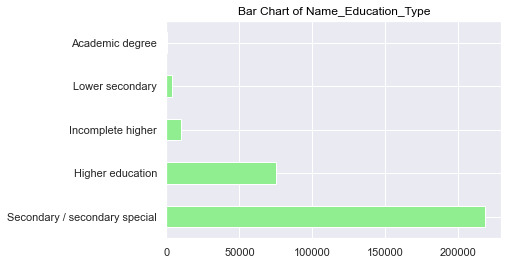

In [508]:
use_barh_plot("NAME_EDUCATION_TYPE",app)

- Majority of the applicants had a Secondary education (71.01%) followed by Higher education (24.34%). Academic degree had the lowest percentage 

##### AMT_ANNUITY_GROUP

In [509]:
app.AMT_ANNUITY_GROUP.value_counts(normalize=True)*100

35-100k    24.179701
20-25k     15.726968
25-30k     14.345875
15-20k     13.926376
10-15k     13.136809
30-35k     10.948587
5-10k       7.200416
0-5k        0.371045
100k+       0.164222
Name: AMT_ANNUITY_GROUP, dtype: float64

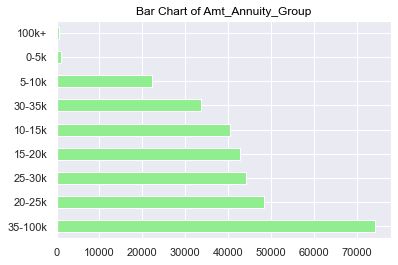

In [510]:
use_barh_plot("AMT_ANNUITY_GROUP",app)

- Applicants took Annuities ranging from 35-100K which topped the graph with 24.17%
- Followed by 20-25k (15.72%), 25-30K (14.34%) etc.

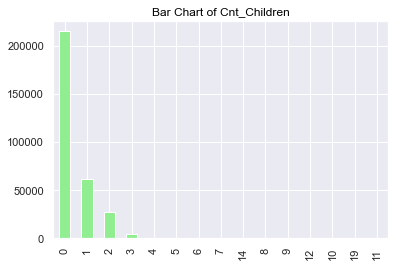

In [511]:
use_bar_plot("CNT_CHILDREN",app)

- applicants who had childrens count with 0 was the highest 

## Bivariate Analysis & Multivariate Analysis 

##### Plotting using for_loop

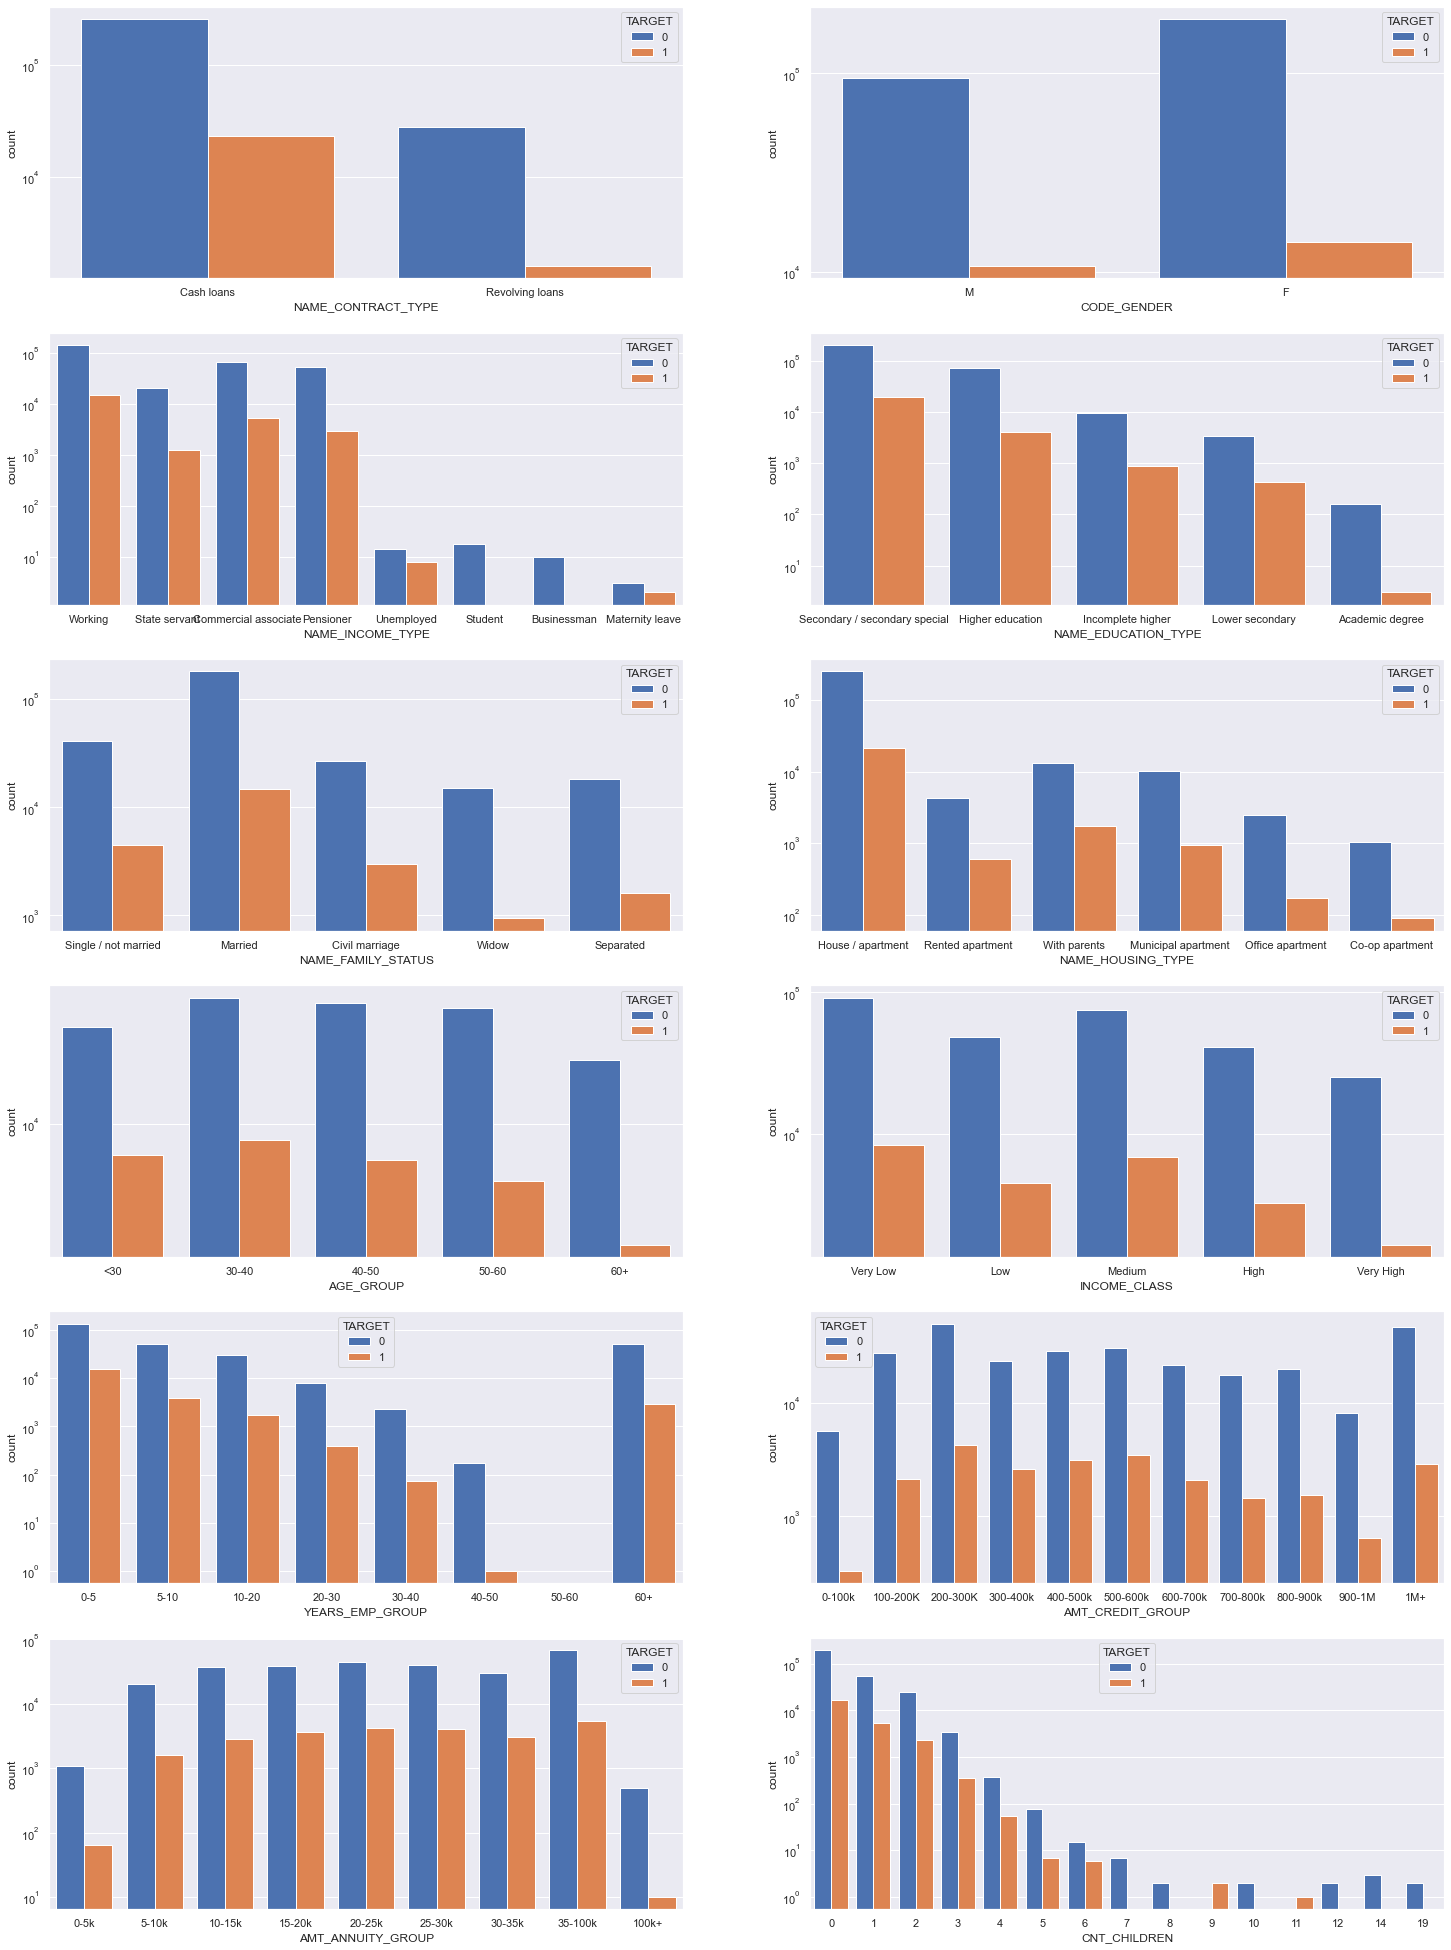

In [512]:
plt.figure(figsize=(25,35))
sns.set(font_scale=1)
for i in enumerate(Category):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(data=app,x=i[1],hue='TARGET', saturation=1)
    plt.yscale("log")
plt.show()

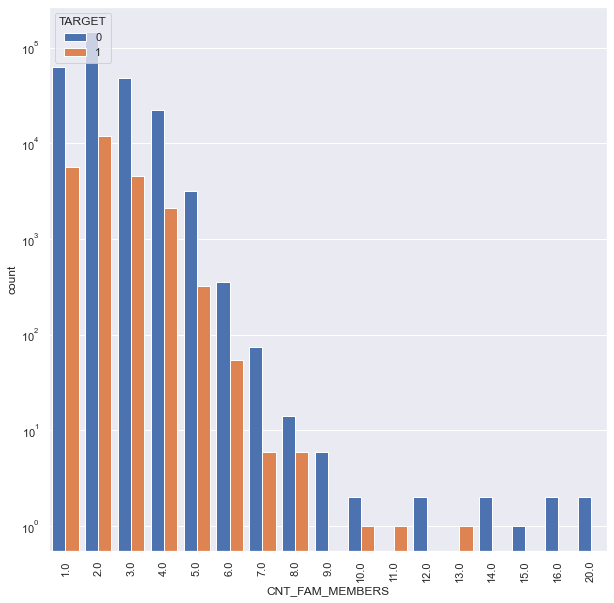

In [513]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.countplot(x= app.CNT_FAM_MEMBERS,hue='TARGET',data=app, saturation=1)
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

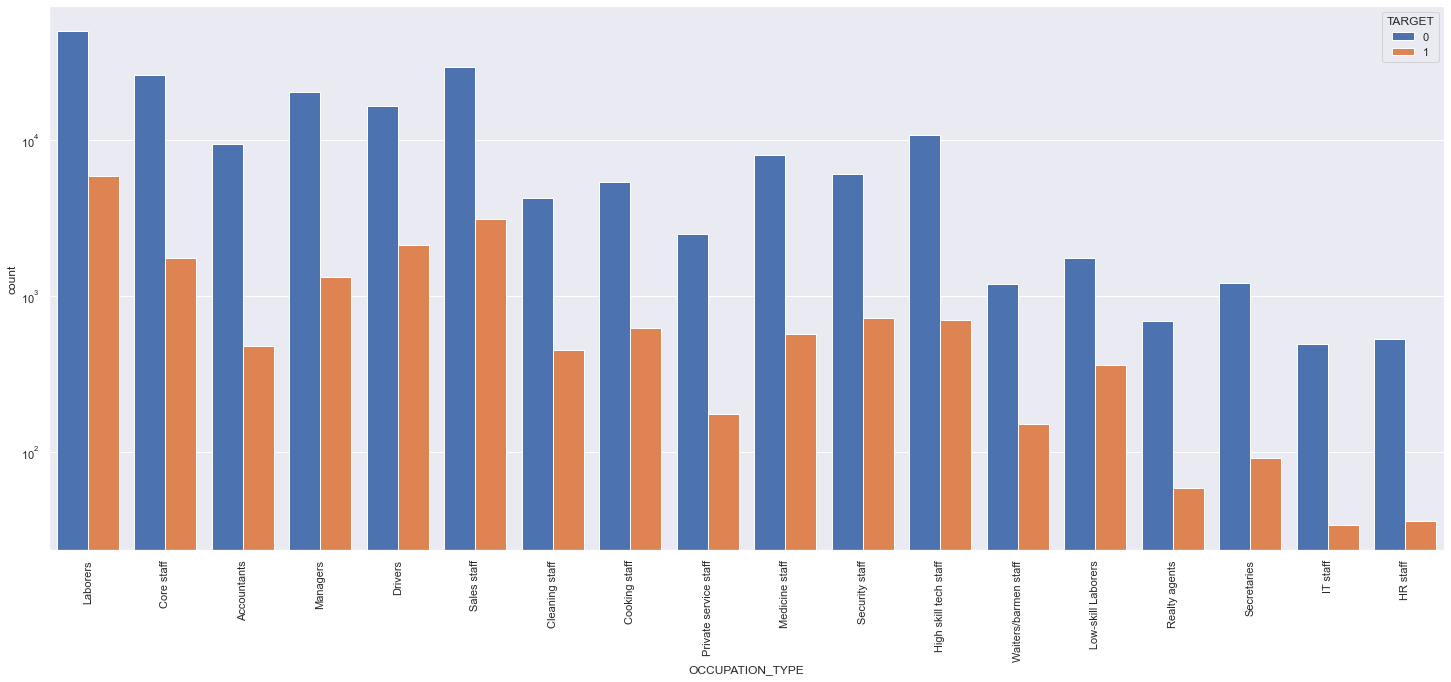

In [514]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1)
sns.countplot(x= app.OCCUPATION_TYPE,hue='TARGET',data=app, saturation=1)
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

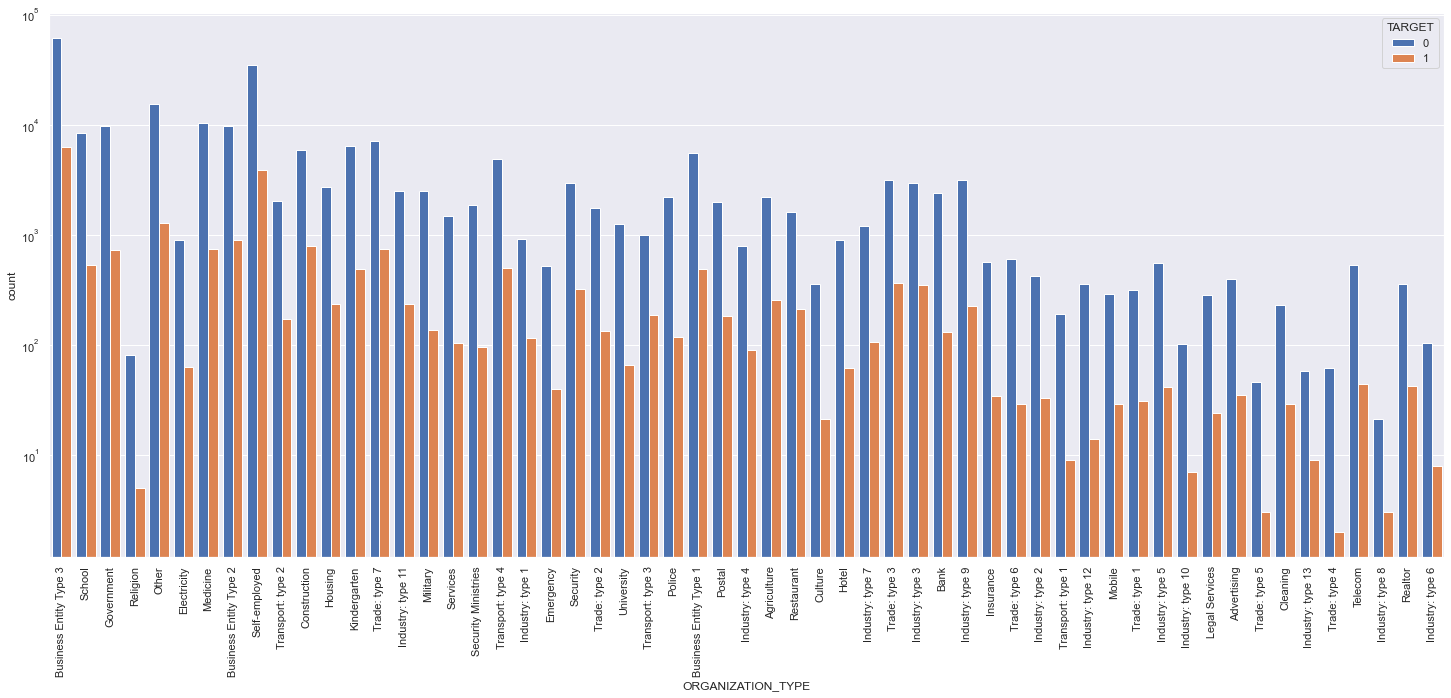

In [515]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1)
sns.countplot(x= app.ORGANIZATION_TYPE,hue='TARGET',data=app,saturation=1)
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

## Finding More Important Insights

##### NAME_CONTRACT_TYPE

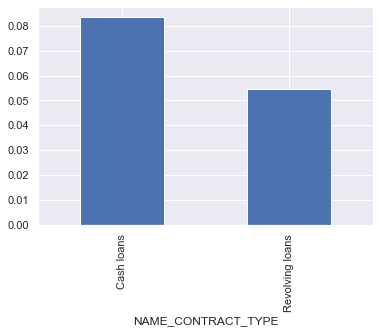

In [516]:
app.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().plot.bar()
plt.show()

- Cash Loans had the highest percentage of defaulters
- whereas revolving loans had lesser percentage of defaulters

##### CODE_GENDER

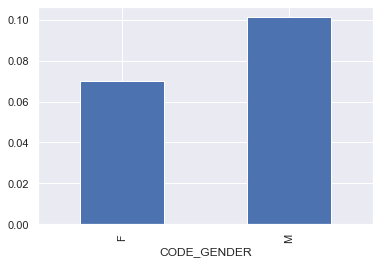

In [517]:
app.groupby("CODE_GENDER")["TARGET"].mean().plot.bar()
plt.show()

- Males had a higher percentage of Defaulting in comparison to Females
- Females were very less likely to default compared to males

##### NAME_INCOME_TYPE

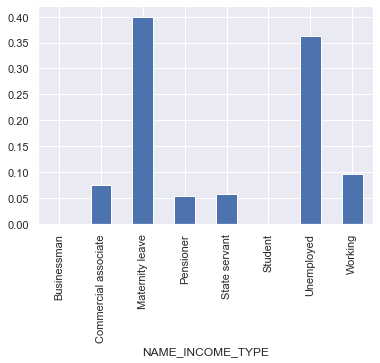

In [518]:
app.groupby("NAME_INCOME_TYPE")["TARGET"].mean().plot.bar()
plt.show()

- Unemployed clients had high default rate
- Maternity Leave clients were also higher in default rate
- Students and Businessman were very less likely to Default

##### NAME_EDUCATION_TYPE

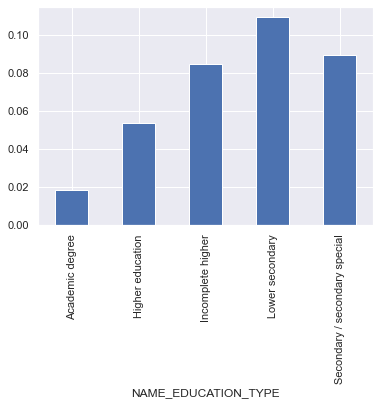

In [519]:
app.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.bar()
plt.show()

- Lower Secondary, Secondary, Incomplete higher education clients had the bigger hand in defaulting
- Academic Degree holders had the least default ratio

##### NAME_FAMILY_STATUS

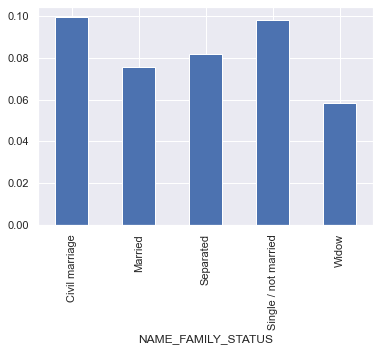

In [520]:
app.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().plot.bar()
plt.show()

- Civil marriage and Unmarried Clients had the most default ratio
- Widows were the least likely to default

##### NAME_HOUSING_TYPE

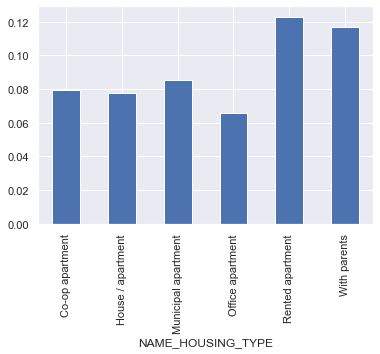

In [521]:
app.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.bar()
plt.show()

- Clients living in Rented Apartments and with parents had the Highest default percentage
- Office apartment, House, and Co-op had the least default percentage

##### AGE_GROUP

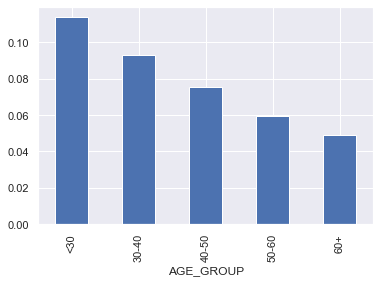

In [522]:
app.groupby("AGE_GROUP")["TARGET"].mean().plot.bar()
plt.show()

- Clients with age less than 30 had the most default percentage, followed by middle aged clients (30-40)
- 60+ aged clients had the least default percentage 


##### INCOME_CLASS

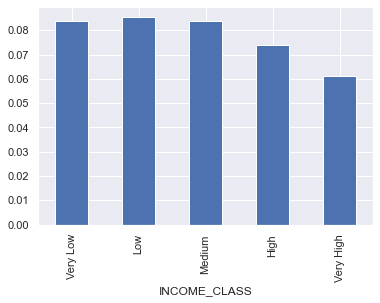

In [523]:
app.groupby("INCOME_CLASS")["TARGET"].mean().plot.bar()
plt.show()

- Very Low to Medium Class waged clients had the most default percentage
- High to Very High waged Clients were less likely to default

##### YEARS_EMP_GROUP

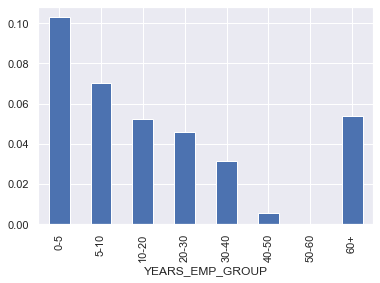

In [524]:
app.groupby("YEARS_EMP_GROUP")["TARGET"].mean().plot.bar()
plt.show()

- 0-5 Years Employed people were the most likely to default followed by 5-10 years 
- 30-40 and 40-50 years employed clients had the least default percentage
- Since we are not going to remove outliers for the sake of Case study, there is an outlier of peak value in 60+ group which is an data error

##### AMT_CREDIT_GROUP

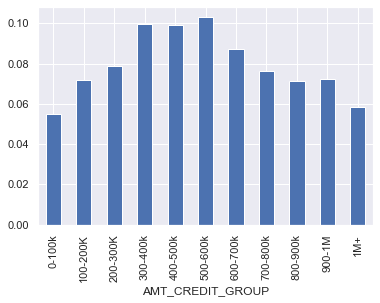

In [525]:
app.groupby("AMT_CREDIT_GROUP")["TARGET"].mean().plot.bar()
plt.show()

- 300K- 700K credit group had the highest default percentage 
- whereas 0-100k credit group had the least default percentage 

##### AMT_ANNUITY_GROUP

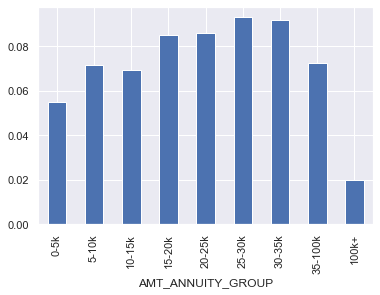

In [526]:
app.groupby("AMT_ANNUITY_GROUP")["TARGET"].mean().plot.bar()
plt.show()

- Annuity ranging from 15K-35K had the highest Default rate 
- 0-5K annuity was lower in default 
- 100k+ Annuity was the lowest in default rate

##### CNT_FAM_MEMBERS

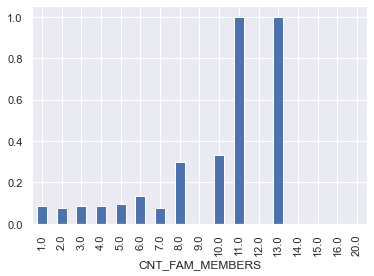

In [527]:
app.groupby("CNT_FAM_MEMBERS")["TARGET"].mean().plot.bar()
plt.show()

- Family members with higher number of members were the most likely to Default, ranging from 10-13 members
- with peak values noticed between 11-13 members
- Members with 1-5 were able to repay the loan 

##### OCCUPATION_TYPE

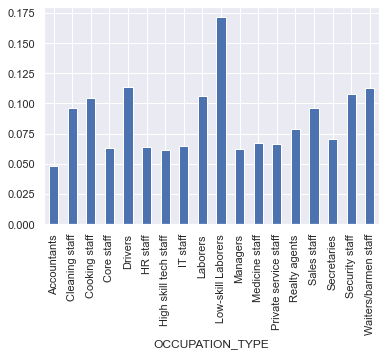

In [528]:
app.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.bar()
plt.show()

- Low skill laborers had the most Default rate
- Followed by Waiters, Drivers
- Least default rate was from Accountants and IT staff, HR staff

##### ORGANIZATION_TYPE

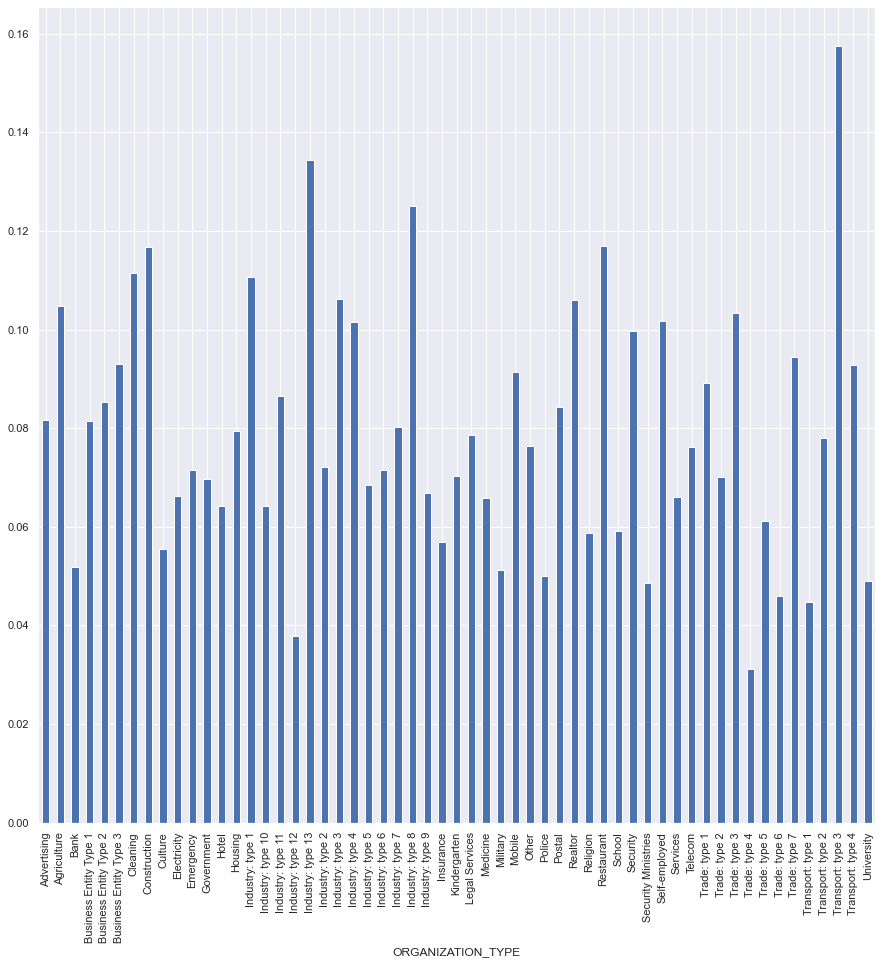

In [529]:
plt.figure(figsize=[15,15])
app.groupby("ORGANIZATION_TYPE")["TARGET"].mean().plot.bar()
plt.show()

- Transport Type 3, Industry type 13 organizations had the highest default rate
- Least being Trade Type 4, Industry type 12

##### CNT_CHILDREN

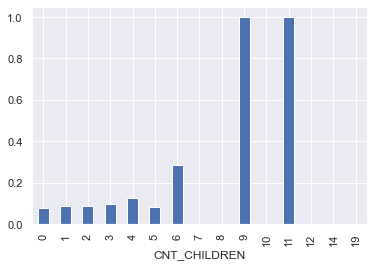

In [530]:
app.groupby("CNT_CHILDREN")["TARGET"].mean().plot.bar()
plt.show()

- Clients who had high amount of Children were the most likely to default, ranging from 9-11
- Lower number of Children allowed the Clients to Repay the loan 

## Splitting Target Variable into 2 columns for below analysis


In [531]:
Defaulters = app[app["TARGET"] == 1]

In [532]:
NonDefaulters = app[app["TARGET"]== 0]

### Numerical- Categorical Analysis

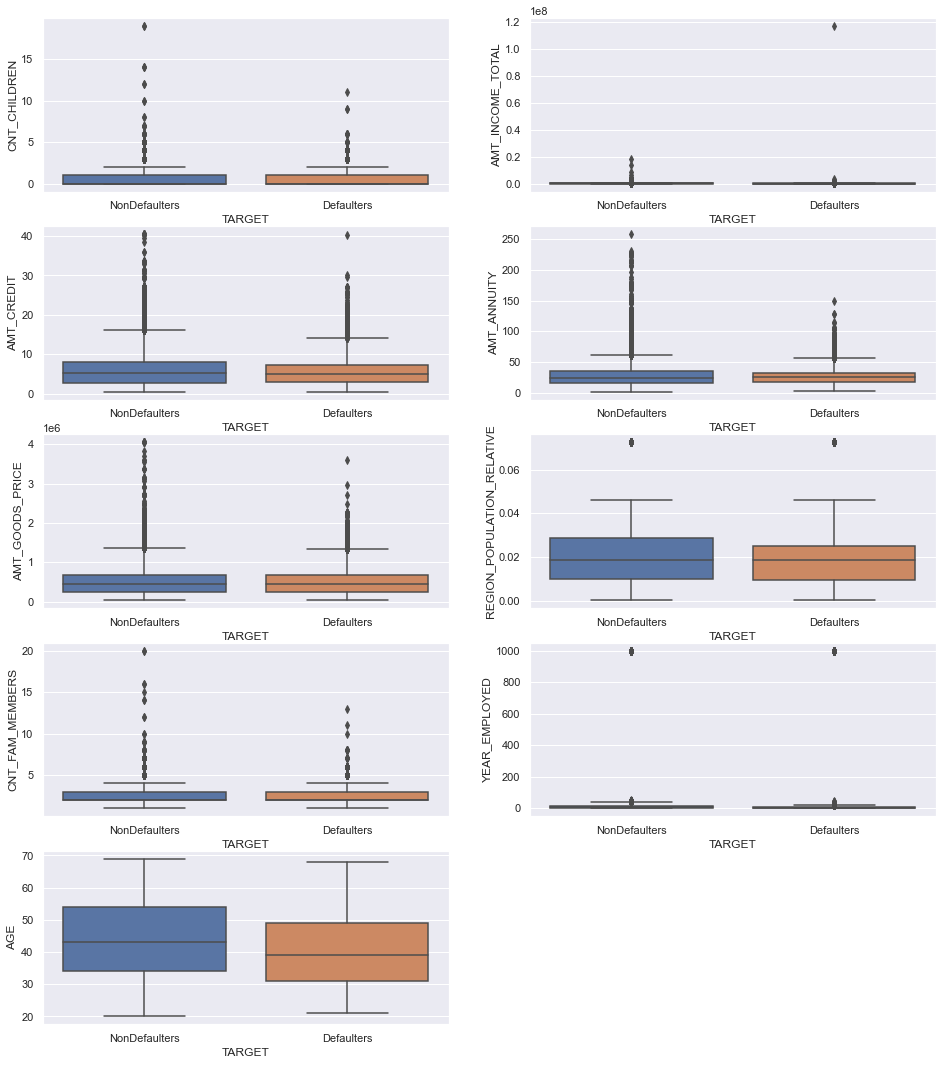

In [533]:
plt.figure(figsize=(16,30))
for i in enumerate(Numerical):
    plt.subplot(8,2,i[0]+1)
    sns.boxplot(data=app,x='TARGET',y=app[i[1]])
    plt.xticks([0,1],['NonDefaulters','Defaulters'])
plt.show()

- Boxplots confirm our above analysis to be true for Defaulters and Non defaulters

## Numeric- Numeric Analysis

### Pairplot 

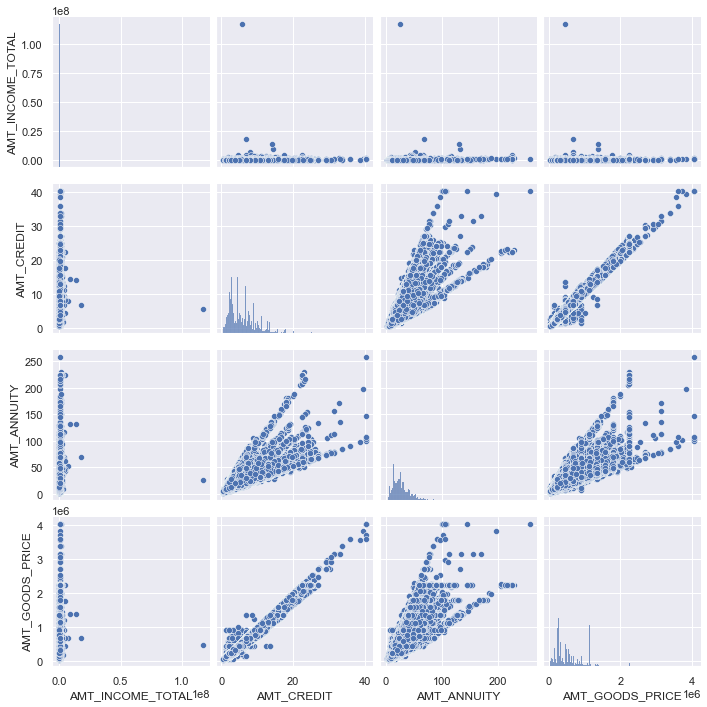

In [534]:
sns.pairplot(data=app,vars=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"])
plt.show()

- There is a linear Correlation between: 
  - AMT_GOODS_PRICE and AMT_CREDIT
  - AMT_ANNUITY AND AMT_GOODS_PRICE
  - AMT_ANNUITY AND AMT_CREDIT

### Heatmap

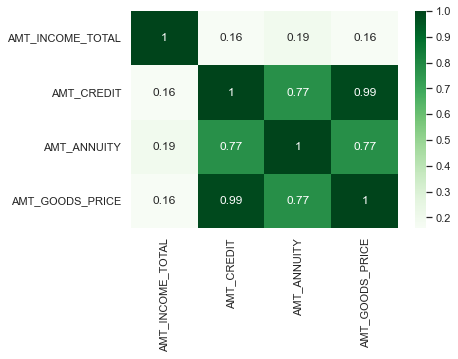

In [535]:
sns.heatmap(app[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]].corr(), annot=True, cmap="Greens")
plt.show()

In [536]:
Numerical=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY",
           "AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","CNT_FAM_MEMBERS","YEAR_EMPLOYED","AGE"]

## Heatmap with Different variables 

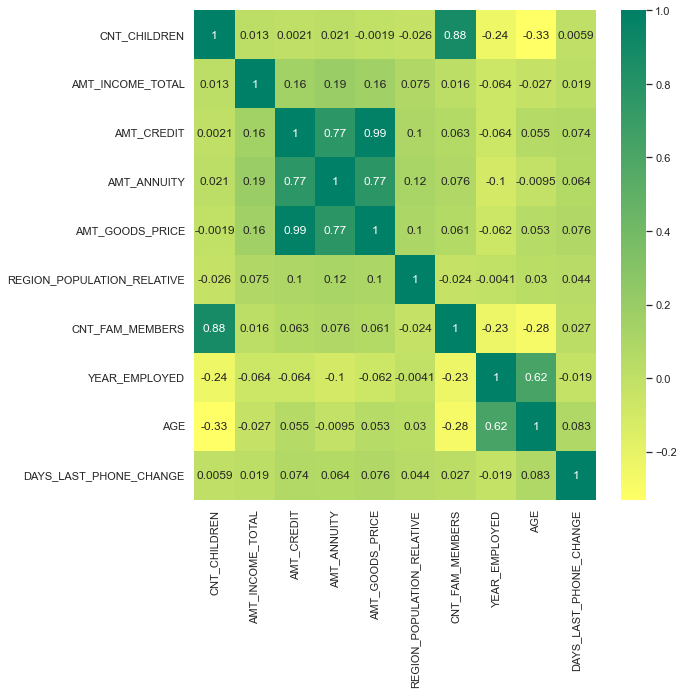

In [537]:
plt.figure(figsize=[9,9])
sns.heatmap(app[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY",
           "AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","CNT_FAM_MEMBERS","YEAR_EMPLOYED","AGE","DAYS_LAST_PHONE_CHANGE"]].corr(), annot=True, cmap="summer_r")
plt.show()

### Heatmap of Occupation type vs Name Housing Type wrt Target 

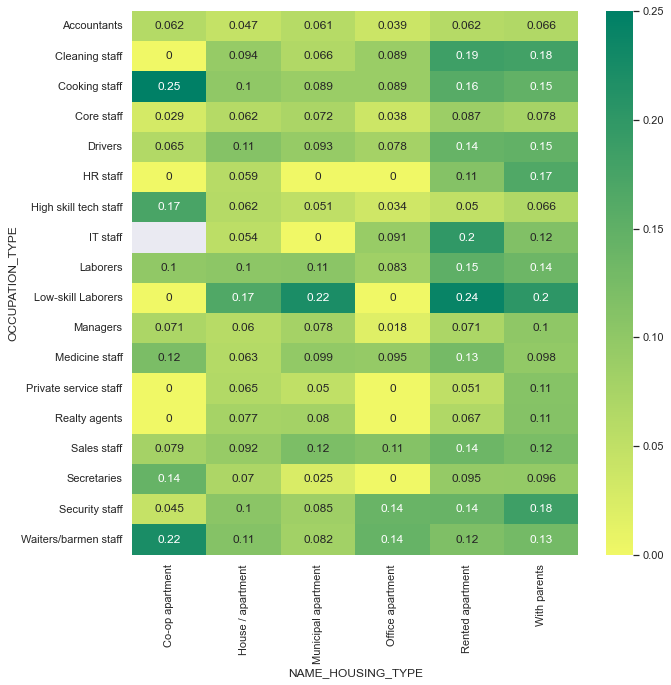

In [538]:
plt.figure(figsize=[10,10])
piv = pd.pivot_table(data=app, index="OCCUPATION_TYPE", columns="NAME_HOUSING_TYPE", values="TARGET")
sns.heatmap(piv, cmap="summer_r", annot=True, center=0.117)
plt.show()

### Heatmap of Name_Education_type vs Income_class wrt Target

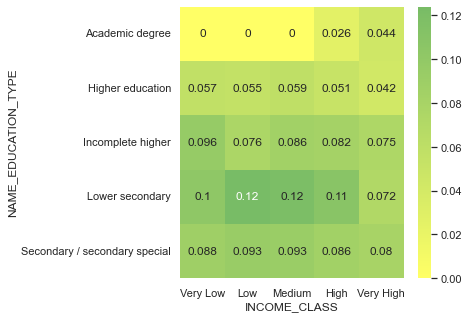

In [539]:
plt.figure(figsize=[5,5])
piv = pd.pivot_table(data=app, index="NAME_EDUCATION_TYPE", columns="INCOME_CLASS", values="TARGET")
sns.heatmap(piv, cmap="summer_r", annot=True, center=0.117)
plt.show()

# PREVIOUS APPLICATION DATASET

### Reading Data 

In [540]:
pre= pd.read_csv(r"C:\Users\yasin\Downloads\Credit EDA Case Study\Credit EDA Case Study\previous_application.csv")

In [541]:
pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [542]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [543]:
pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Cleaning

In [544]:
prenull= pre.isnull().mean().sort_values(ascending=False)*100

In [545]:
pre = pre.loc[:, prenull <= 40]

In [546]:
pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [547]:
pre.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [548]:
pre.isnull().mean().sort_values(ascending=False)*100

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [549]:
#Dropping columns which are of no importance 
col_drop= ["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT",
          "NFLAG_LAST_APPL_IN_DAY","DAYS_DECISION","AMT_APPLICATION","NAME_CASH_LOAN_PURPOSE","SK_ID_PREV","NAME_GOODS_CATEGORY"
          ,"NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP"
          ,"CODE_REJECT_REASON", "PRODUCT_COMBINATION"]
pre= pre.drop(col_drop,axis=1)

In [550]:
pre.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CNT_PAYMENT
0,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Cash through the bank,Repeater,12.0
1,108129,Cash loans,25188.615,679671.0,607500.0,Approved,XNA,Repeater,36.0
2,122040,Cash loans,15060.735,136444.5,112500.0,Approved,Cash through the bank,Repeater,12.0
3,176158,Cash loans,47041.335,470790.0,450000.0,Approved,Cash through the bank,Repeater,12.0
4,202054,Cash loans,31924.395,404055.0,337500.0,Refused,Cash through the bank,Repeater,24.0


In [551]:
pre.isnull().mean().sort_values(ascending=False)*100

AMT_GOODS_PRICE         23.081773
AMT_ANNUITY             22.286665
CNT_PAYMENT             22.286366
AMT_CREDIT               0.000060
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
NAME_CONTRACT_STATUS     0.000000
NAME_PAYMENT_TYPE        0.000000
NAME_CLIENT_TYPE         0.000000
dtype: float64

#### Filling missing Values with Median

In [552]:
pre_missing = ["AMT_GOODS_PRICE","AMT_ANNUITY","CNT_PAYMENT"]

In [553]:
for i in pre_missing:
    pre[i].fillna(pre[i].median(), inplace=True)

In [554]:
pre.isnull().mean().sort_values(ascending=False)*100

AMT_CREDIT              0.00006
SK_ID_CURR              0.00000
NAME_CONTRACT_TYPE      0.00000
AMT_ANNUITY             0.00000
AMT_GOODS_PRICE         0.00000
NAME_CONTRACT_STATUS    0.00000
NAME_PAYMENT_TYPE       0.00000
NAME_CLIENT_TYPE        0.00000
CNT_PAYMENT             0.00000
dtype: float64

### Checking for XNA values

##### Replacing Payment Type XNA values

In [555]:
pre.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

In [556]:
pre.NAME_PAYMENT_TYPE.mode()

0    Cash through the bank
Name: NAME_PAYMENT_TYPE, dtype: object

In [557]:
# As we can see ourself most occuring data is Cash through the bank
# But we will still use Mode to show the most occuring data is Cash through the bank hence we will impute Xna to Cash through the bank

In [558]:
pre.NAME_PAYMENT_TYPE.replace("XNA","Cash through the bank", inplace=True)

In [559]:
pre.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1660936
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

##### Replacing Client type XNA values

In [560]:
pre.NAME_CLIENT_TYPE.value_counts(normalize=True)*100

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

In [561]:
pre.NAME_CLIENT_TYPE.mode()

0    Repeater
Name: NAME_CLIENT_TYPE, dtype: object

In [562]:
pre.NAME_CLIENT_TYPE.replace("XNA","Repeater", inplace=True)

##### Replacing Contract type XNA values

In [563]:
pre.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

In [564]:
pre.NAME_CONTRACT_TYPE.replace("XNA","Cash loans", inplace=True)

In [565]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE    1670214 non-null  object 
 2   AMT_ANNUITY           1670214 non-null  float64
 3   AMT_CREDIT            1670213 non-null  float64
 4   AMT_GOODS_PRICE       1670214 non-null  float64
 5   NAME_CONTRACT_STATUS  1670214 non-null  object 
 6   NAME_PAYMENT_TYPE     1670214 non-null  object 
 7   NAME_CLIENT_TYPE      1670214 non-null  object 
 8   CNT_PAYMENT           1670214 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 114.7+ MB


### UNIVARIATE ANALYSIS

##### NAME CONTRACT TYPE

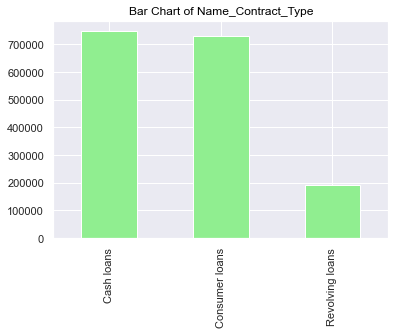

In [566]:
use_bar_plot("NAME_CONTRACT_TYPE",pre)

- Among previous customers Cash loans were the highest applied for, followed by Consumer loans and then Revolving loans

##### NAME CONTRACT STATUS

In [567]:
pre.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

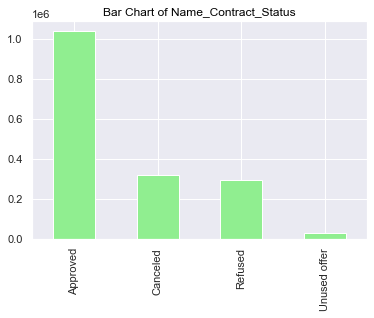

In [568]:
use_bar_plot("NAME_CONTRACT_STATUS",pre)

- Majority of the applicants got approved of getting the loans, with 18% cancelled and 17% Refused 

##### NAME PAYMENT TYPE

In [569]:
pre.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100

Cash through the bank                        99.444502
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

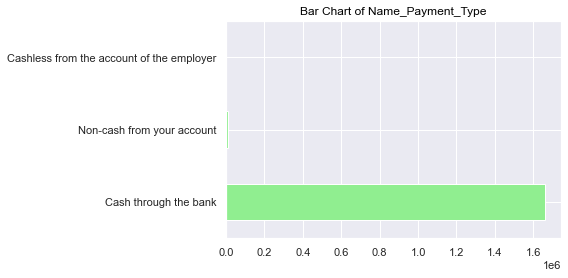

In [570]:
use_barh_plot("NAME_PAYMENT_TYPE",pre)

##### NAME CLIENT TYPE

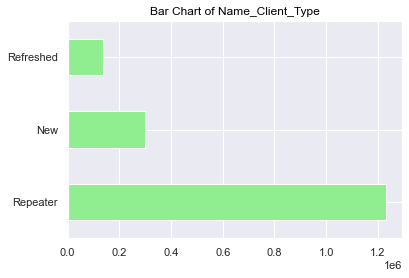

In [571]:
use_barh_plot("NAME_CLIENT_TYPE",pre)

In [572]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE    1670214 non-null  object 
 2   AMT_ANNUITY           1670214 non-null  float64
 3   AMT_CREDIT            1670213 non-null  float64
 4   AMT_GOODS_PRICE       1670214 non-null  float64
 5   NAME_CONTRACT_STATUS  1670214 non-null  object 
 6   NAME_PAYMENT_TYPE     1670214 non-null  object 
 7   NAME_CLIENT_TYPE      1670214 non-null  object 
 8   CNT_PAYMENT           1670214 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 114.7+ MB


### BIVARIATE/ MULTIVARIATE ANALYSIS

##### PAIRPLOT

<Figure size 360x360 with 0 Axes>

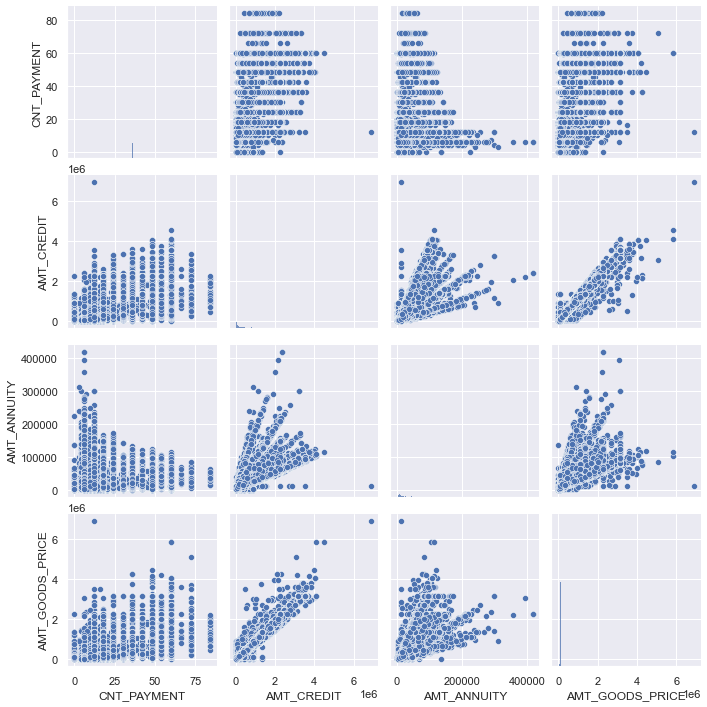

In [573]:
plt.figure(figsize=[5,5])
sns.pairplot(data=pre,vars=["CNT_PAYMENT","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"])
plt.show()

##### HEATMAP

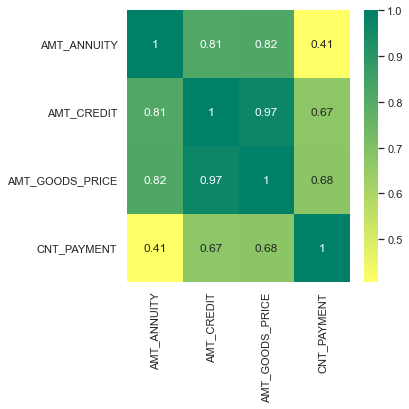

In [574]:
plt.figure(figsize=[5,5])
sns.heatmap(pre[["AMT_ANNUITY","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]].corr(), annot=True, cmap="summer_r")
plt.show()

# MERGING DATA

##### READING DATA BY MERGING WITH SK_ID_CURR

In [575]:
merged= pd.merge(left= app[["SK_ID_CURR","TARGET"]], right= pre,how="inner", on=["SK_ID_CURR"] )

In [576]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CNT_PAYMENT
0,100002,1,Consumer loans,9251.775,179055.0,179055.0,Approved,Cash through the bank,New,24.0
1,100003,0,Cash loans,98356.995,1035882.0,900000.0,Approved,Cash through the bank,Repeater,12.0
2,100003,0,Consumer loans,64567.665,348637.5,337500.0,Approved,Cash through the bank,Refreshed,6.0
3,100003,0,Consumer loans,6737.310,68053.5,68809.5,Approved,Cash through the bank,Refreshed,12.0
4,100004,0,Consumer loans,5357.250,20106.0,24282.0,Approved,Cash through the bank,New,4.0


In [577]:
merged.shape

(1413701, 10)

In [578]:
merged.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,1.484032e+04,1.963541e+05,2.006552e+05,1.517141e+01
std,1.028118e+05,2.811789e-01,1.316370e+04,3.194813e+05,2.820189e+05,1.299505e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,7.406055e+03,2.488050e+04,6.637500e+04,1.000000e+01
50%,2.789920e+05,0.000000e+00,1.125000e+04,8.059500e+04,1.123200e+05,1.200000e+01
75%,3.675560e+05,0.000000e+00,1.674797e+04,2.156400e+05,1.800000e+05,1.800000e+01
max,4.562550e+05,1.000000e+00,4.180581e+05,4.509688e+06,5.850000e+06,8.400000e+01


##### NAME CONTRACT STATUS wrt TARGET

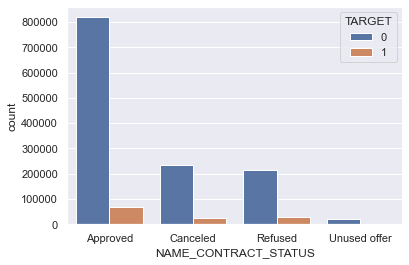

In [579]:
sns.countplot(data=merged,x="NAME_CONTRACT_STATUS", hue="TARGET")
plt.show()

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS'>

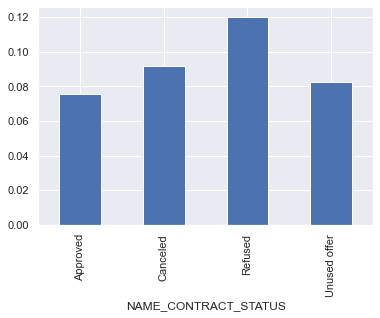

In [583]:
merged.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().plot.bar()

##### NAME_CLIENT_TYPE wrt TARGET

<AxesSubplot:xlabel='NAME_CLIENT_TYPE'>

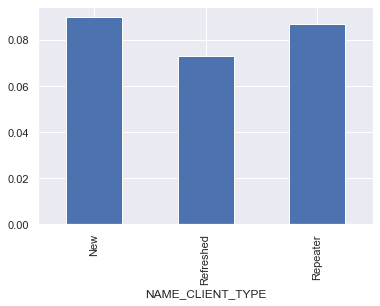

In [580]:
merged.groupby("NAME_CLIENT_TYPE")["TARGET"].mean().plot.bar()

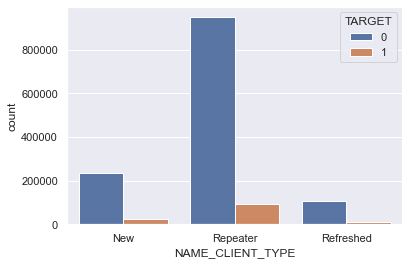

In [581]:
sns.countplot(data=merged,x="NAME_CLIENT_TYPE", hue="TARGET")
plt.show()

##### NAME_CONTRACT_TYPE WRT TARGET

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE'>

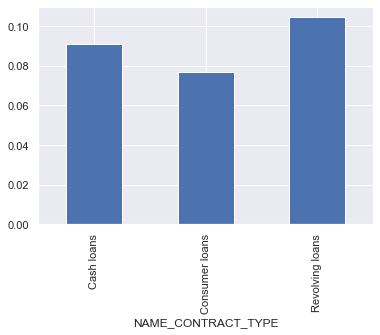

In [584]:
merged.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().plot.bar()

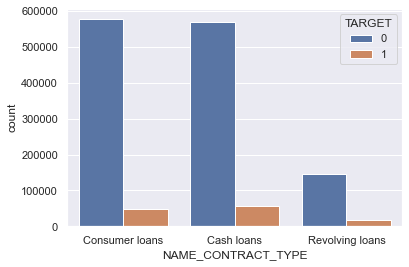

In [582]:
sns.countplot(data=merged,x="NAME_CONTRACT_TYPE", hue="TARGET")
plt.show()

- New Clients had more default ratio compared to repeaters
- most Loans taken were Consumer loans Followed by Cash loans 
- Majority of the applicants were REFUSED,  while some were Accepted
- Revolving loans had higher default ratio